# Laden

In [1]:


#  CSV erkennen by David Maksimovic 24.06.2019
from __future__ import absolute_import, division, print_function, unicode_literals

import tensorflow as tf
#import keras

#from keras import regularizers
from tensorflow import keras
from tensorflow.keras import regularizers, layers
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout,LeakyReLU, Activation, Flatten, Conv2D, MaxPooling2D, BatchNormalization, AveragePooling2D, GlobalAveragePooling2D
from tensorflow.keras.callbacks import TensorBoard, ModelCheckpoint, EarlyStopping
import time
import pickle
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt
import pydot_ng as pydot
import numpy as np
import glob
import os
import random



########### Normalisieren ###########

#Ist schon normalisiert
########### Normalisieren ###########

#Ist schon normalisiert

In [2]:

########### Daten laden ###########
X= pickle.load(open("C:/Users/Deep Thought/Documents/Python/CNN_Masterarbeit/BeamlikePI/pickle/X_Beamlike_PI_globalnorm_PMT160andLAPPD5x5_120k_Files_mitTopBottom.pickle","rb"))
Y= pickle.load(open("C:/Users/Deep Thought/Documents/Python/CNN_Masterarbeit/BeamlikePI/pickle/Y_Beamlike_PI_globalnorm_PMT160andLAPPD5x5_120k_Files_mitTopBottom.pickle","rb"))



In [2]:
### timeflipped 

X= pickle.load(open("C:/Users/Deep Thought/Documents/Python/CNN_Masterarbeit/BeamlikePI/pickle/X_Beamlike_PID_globalnorm_PMT160andLAPPD5x5_timeflipped_120k_Files_mitTopBottom.pickle","rb"))
Y= pickle.load(open("C:/Users/Deep Thought/Documents/Python/CNN_Masterarbeit/BeamlikePI/pickle/Y_Beamlike_PID_globalnorm_PMT160andLAPPD5x5_timeflipped_120k_Files_mitTopBottom.pickle","rb"))

In [3]:
unique, counts = np.unique(Y, return_counts=True, axis=0)
print(counts)
print(unique)
print(100/(counts[0]+counts[1])*counts[1])

[59977 60028]
[[0 1]
 [1 0]]
50.021249114620225


In [3]:
unique, counts = np.unique(Y, return_counts=True, axis=0)
print(counts)
print(unique)
print(100/(counts[0]+counts[1])*counts[1])

[59977 60028]
[[0 1]
 [1 0]]
50.021249114620225


In [4]:
unique, counts = np.unique(Y, return_counts=True, axis=0)
print(counts)
print(unique)
print(100/(counts[0]+counts[1])*counts[1])

[59977 60028]
[[0 1]
 [1 0]]
50.021249114620225


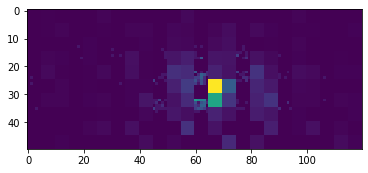

In [4]:
plt.imshow(X[7,:,:,0], cmap='viridis', interpolation='None')

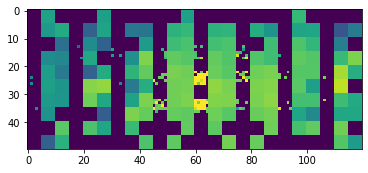

In [5]:
plt.imshow(X[7,:,:,1], cmap='viridis', interpolation='None')

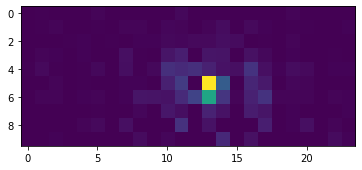

In [6]:
plt.imshow(X[7,:,:,0], cmap='viridis', interpolation='None')

## 120 k files

In [3]:
training_data = list(zip(X, Y))
import random
random.shuffle(training_data)

for sample in Y[:5]:
    print("Eintrag \n", sample)

X1 =[]
Y1 =[]

for x in training_data[:85000]:
    
    X1.append(x[0])
    Y1.append(x[1])
    
    
XTraining = np.array(X1)
YTraining = np.array(Y1)

X2 =[]
Y2 =[]

for x in training_data[85000:105000]:
    
    X2.append(x[0])
    Y2.append(x[1])
    
    
XVal = np.array(X2)
Yval = np.array(Y2)

X3 =[]
Y3 =[]

for x in training_data[105000:]:
    
    X3.append(x[0])
    Y3.append(x[1])
    
    
XTest = np.array(X3)
YTest = np.array(Y3)

print(XTraining.shape,XVal.shape,XTest.shape)
del X,Y,X1,X2,X3,Y1,Y2,Y3

Eintrag 
 [1 0]
Eintrag 
 [1 0]
Eintrag 
 [1 0]
Eintrag 
 [1 0]
Eintrag 
 [1 0]
(85000, 50, 120, 2) (20000, 50, 120, 2) (15005, 50, 120, 2)


# Testen der besten Methode

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_24 (Conv2D)           (None, 50, 120, 400)      7600      
_________________________________________________________________
max_pooling2d_24 (MaxPooling (None, 25, 60, 400)       0         
_________________________________________________________________
batch_normalization_37 (Batc (None, 25, 60, 400)       1600      
_________________________________________________________________
dropout_37 (Dropout)         (None, 25, 60, 400)       0         
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 25, 60, 400)       1440400   
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 13, 30, 400)       0         
_________________________________________________________________
batch_normalization_38 (Batc (None, 13, 30, 400)      

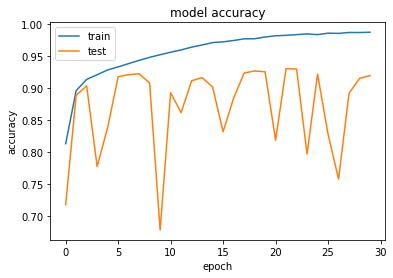

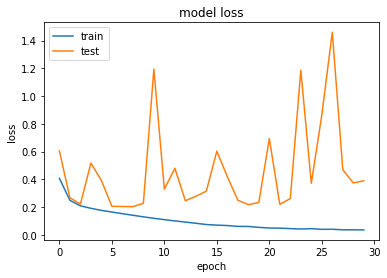

Ende des Versuchs: 
Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_27 (Conv2D)           (None, 50, 120, 400)      7600      
_________________________________________________________________
max_pooling2d_27 (MaxPooling (None, 25, 60, 400)       0         
_________________________________________________________________
batch_normalization_41 (Batc (None, 25, 60, 400)       1600      
_________________________________________________________________
dropout_41 (Dropout)         (None, 25, 60, 400)       0         
_________________________________________________________________
conv2d_28 (Conv2D)           (None, 25, 60, 400)       1440400   
_________________________________________________________________
max_pooling2d_28 (MaxPooling (None, 13, 30, 400)       0         
_________________________________________________________________
batch_normalization_42 (Batc (None

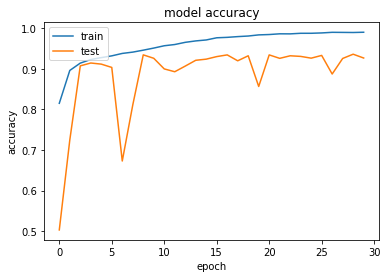

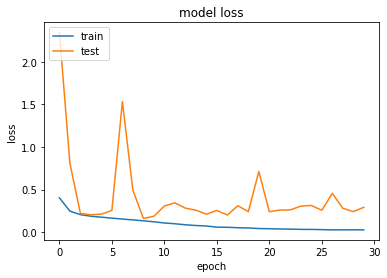

Ende des Versuchs: 
Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_31 (Conv2D)           (None, 50, 120, 400)      7600      
_________________________________________________________________
max_pooling2d_31 (MaxPooling (None, 25, 60, 400)       0         
_________________________________________________________________
batch_normalization_46 (Batc (None, 25, 60, 400)       1600      
_________________________________________________________________
dropout_46 (Dropout)         (None, 25, 60, 400)       0         
_________________________________________________________________
conv2d_32 (Conv2D)           (None, 25, 60, 400)       1440400   
_________________________________________________________________
max_pooling2d_32 (MaxPooling (None, 13, 30, 400)       0         
_________________________________________________________________
batch_normalization_47 (Batc (None

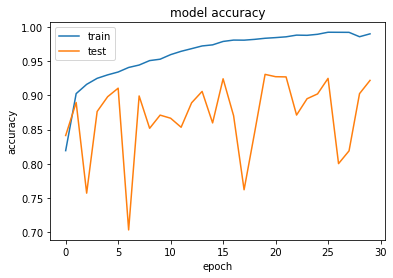

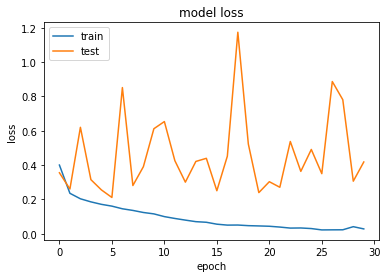

Ende des Versuchs: 
Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_34 (Conv2D)           (None, 50, 120, 400)      7600      
_________________________________________________________________
max_pooling2d_34 (MaxPooling (None, 25, 60, 400)       0         
_________________________________________________________________
batch_normalization_51 (Batc (None, 25, 60, 400)       1600      
_________________________________________________________________
dropout_51 (Dropout)         (None, 25, 60, 400)       0         
_________________________________________________________________
conv2d_35 (Conv2D)           (None, 25, 60, 400)       1440400   
_________________________________________________________________
max_pooling2d_35 (MaxPooling (None, 13, 30, 400)       0         
_________________________________________________________________
batch_normalization_52 (Batc (Non

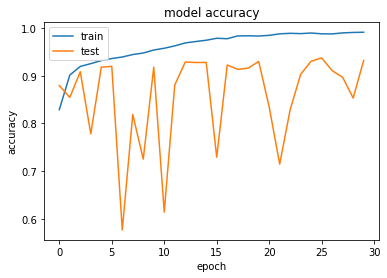

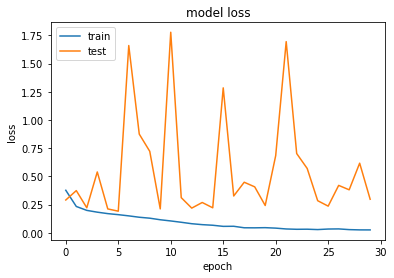

Ende des Versuchs: 
Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_38 (Conv2D)           (None, 50, 120, 400)      7600      
_________________________________________________________________
max_pooling2d_38 (MaxPooling (None, 25, 60, 400)       0         
_________________________________________________________________
batch_normalization_57 (Batc (None, 25, 60, 400)       1600      
_________________________________________________________________
dropout_57 (Dropout)         (None, 25, 60, 400)       0         
_________________________________________________________________
conv2d_39 (Conv2D)           (None, 25, 60, 400)       1440400   
_________________________________________________________________
max_pooling2d_39 (MaxPooling (None, 13, 30, 400)       0         
_________________________________________________________________
batch_normalization_58 (Batc (Non

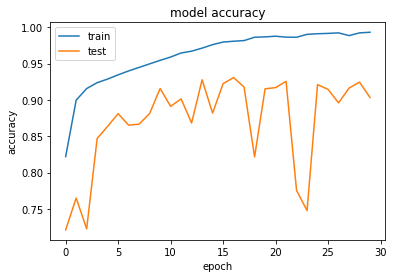

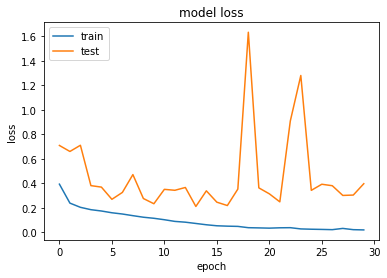

Ende des Versuchs: 
Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_41 (Conv2D)           (None, 50, 120, 400)      7600      
_________________________________________________________________
max_pooling2d_41 (MaxPooling (None, 25, 60, 400)       0         
_________________________________________________________________
batch_normalization_63 (Batc (None, 25, 60, 400)       1600      
_________________________________________________________________
dropout_63 (Dropout)         (None, 25, 60, 400)       0         
_________________________________________________________________
conv2d_42 (Conv2D)           (None, 25, 60, 400)       1440400   
_________________________________________________________________
max_pooling2d_42 (MaxPooling (None, 13, 30, 400)       0         
_________________________________________________________________
batch_normalization_64 (Batc (Non

Epoch 30/30
85000/85000 [==============================] - 152s 2ms/sample - loss: 0.0259 - acc: 0.9907 - val_loss: 0.3632 - val_acc: 0.9231
dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])


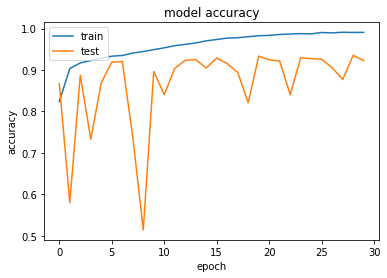

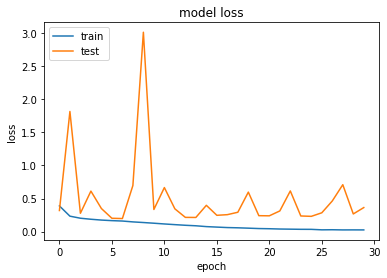

Ende des Versuchs: 


In [7]:
dense_layers = [1,2,3]
layer_sizes = [400]
conv_layers = [3,4] #für 3x3, 3 und 4 conf layer testen
kernal_size = [(3,3)]
for filter_size in kernal_size:
    for dense_layer in dense_layers:
        for layer_size in layer_sizes:
            for conv_layer in conv_layers:
                if conv_layer==2 and layer_size==400 and dense_layer == 3:
                    pass
                elif conv_layer==2 and layer_size==400 and dense_layer == 2:
                    pass
                else:
                    NAME ="PMT-MuEl-{}-filter_size-{}-conv-{}-nodes-{}-dense".format(filter_size,conv_layer, layer_size, dense_layer) #,int(time.time())
                    tensorboard = TensorBoard(log_dir = 'logs\PMTplusLAPPD5x5_CNN\{}'.format(NAME))


                    model = Sequential()
                    model.add(Conv2D(layer_size,filter_size,strides=1, input_shape= XTraining.shape[1:],activation="relu", padding='same'))                                               
                    model.add(MaxPooling2D(pool_size=(2,2),padding='same'))
                    model.add(BatchNormalization())
                    model.add(Dropout(0.2))
                    for l in range(conv_layer-1):                   
                        model.add(Conv2D(layer_size,filter_size,padding='same',activation="relu"))              
                        model.add(MaxPooling2D(pool_size=(2,2),padding='same'))
                        model.add(BatchNormalization())
                        model.add(Dropout(0.2))            
                    #model.add(GlobalAveragePooling2D())
                    model.add(Flatten())
                    for l in range(dense_layer-1):
                        model.add(Dense(512-l*20 ,activation="relu" ))
                        model.add(BatchNormalization())
                        model.add(Dropout(0.2))
                    model.add(Dense(32,activation="relu"))
                    model.add(BatchNormalization())
                    model.add(Dropout(0.2))
                    model.add(Dense(2))
                    model.add(Activation('softmax'))
                    #adam = tf.keras.optimizers.Adam(learning_rate=0.01, beta_1=0.9, beta_2=0.999, amsgrad=True, epsilon = 0.001)
                    model.compile(loss="binary_crossentropy",
                                 optimizer="adam",
                                  metrics=['accuracy']
                                 )   
                    filepath="LAPPD(1x1)_PID_120k-improvement-val-acc_{val_acc:.2f}.model"  
                    checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
                    #monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=10, verbose=1, mode='auto', restore_best_weights=False)
                    model.summary()
                    history=model.fit(

                        XTraining,YTraining,
                  #validation_data=(XVal,Yval)
                     validation_data=(XVal,Yval)   

                  ,batch_size=100,
                    shuffle=True,
                    class_weight='balanced',
                    callbacks=[
                                #monitor,
                                #checkpoint,
                                tensorboard 
                    ],
                  epochs= 30)
                    print(history.history.keys())
                    # summarize history for accuracy
                    plt.plot(history.history['acc'])
                    plt.plot(history.history['val_acc'])
                    plt.title('model accuracy')
                    plt.ylabel('accuracy')
                    plt.xlabel('epoch')
                    plt.legend(['train', 'test'], loc='upper left')
                    plt.show()
                    # summarize history for loss
                    plt.plot(history.history['loss'])
                    plt.plot(history.history['val_loss'])
                    plt.title('model loss')
                    plt.ylabel('loss')
                    plt.xlabel('epoch')
                    plt.legend(['train', 'test'], loc='upper left')
                    plt.show()

                    print("Ende des Versuchs: ")
            

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_45 (Conv2D)           (None, 50, 120, 150)      1350      
_________________________________________________________________
max_pooling2d_45 (MaxPooling (None, 25, 60, 150)       0         
_________________________________________________________________
batch_normalization_70 (Batc (None, 25, 60, 150)       600       
_________________________________________________________________
dropout_70 (Dropout)         (None, 25, 60, 150)       0         
_________________________________________________________________
conv2d_46 (Conv2D)           (None, 25, 60, 150)       90150     
_________________________________________________________________
max_pooling2d_46 (MaxPooling (None, 13, 30, 150)       0         
_________________________________________________________________
batch_normalization_71 (Batc (None, 13, 30, 150)     

Epoch 16/80
84900/85000 [============================>.] - ETA: 0s - loss: 0.1311 - acc: 0.9476
Epoch 00016: val_acc did not improve from 0.92805
85000/85000 [==============================] - 55s 653us/sample - loss: 0.1312 - acc: 0.9476 - val_loss: 0.1943 - val_acc: 0.9230
Epoch 17/80
84900/85000 [============================>.] - ETA: 0s - loss: 0.1278 - acc: 0.9479
Epoch 00017: val_acc did not improve from 0.92805
85000/85000 [==============================] - 57s 668us/sample - loss: 0.1277 - acc: 0.9480 - val_loss: 0.4464 - val_acc: 0.8803
Epoch 18/80
84900/85000 [============================>.] - ETA: 0s - loss: 0.1204 - acc: 0.9512
Epoch 00018: val_acc did not improve from 0.92805
85000/85000 [==============================] - 57s 675us/sample - loss: 0.1204 - acc: 0.9512 - val_loss: 0.3120 - val_acc: 0.8893
Epoch 19/80
84900/85000 [============================>.] - ETA: 0s - loss: 0.1166 - acc: 0.9530
Epoch 00019: val_acc did not improve from 0.92805
85000/85000 [=============

Epoch 46/80
84900/85000 [============================>.] - ETA: 0s - loss: 0.0487 - acc: 0.9823
Epoch 00046: val_acc did not improve from 0.92805
85000/85000 [==============================] - 56s 654us/sample - loss: 0.0486 - acc: 0.9823 - val_loss: 0.2693 - val_acc: 0.9251
Epoch 47/80
84900/85000 [============================>.] - ETA: 0s - loss: 0.0502 - acc: 0.9815
Epoch 00047: val_acc did not improve from 0.92805
85000/85000 [==============================] - 56s 655us/sample - loss: 0.0502 - acc: 0.9815 - val_loss: 0.2883 - val_acc: 0.9023
Epoch 48/80
84900/85000 [============================>.] - ETA: 0s - loss: 0.0479 - acc: 0.9824
Epoch 00048: val_acc did not improve from 0.92805
85000/85000 [==============================] - 56s 653us/sample - loss: 0.0479 - acc: 0.9824 - val_loss: 0.2739 - val_acc: 0.9132
Epoch 49/80
84900/85000 [============================>.] - ETA: 0s - loss: 0.0491 - acc: 0.9812
Epoch 00049: val_acc did not improve from 0.92805
85000/85000 [=============

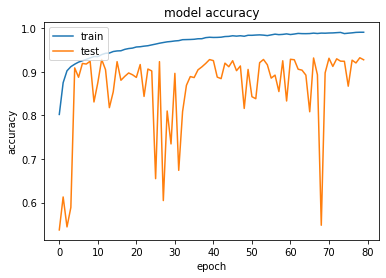

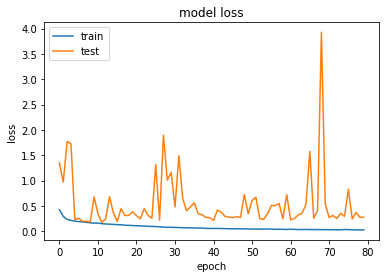

Ende des Versuchs: 


In [8]:
dense_layers = [2]
layer_sizes = [150]
conv_layers = [4]
kernal_size = [(2,2)]
for filter_size in kernal_size:
    for dense_layer in dense_layers:
        for layer_size in layer_sizes:
            for conv_layer in conv_layers:

                NAME ="PMT-MuEl-{}-filter_size-{}-conv-{}-nodes-{}-dense".format(filter_size,conv_layer, layer_size, dense_layer) #,int(time.time())
                tensorboard = TensorBoard(log_dir = 'logs\PMTplusLAPPD_CNN\{}'.format(NAME))


                model = Sequential()
                model.add(Conv2D(layer_size,filter_size,strides=1, input_shape= XTraining.shape[1:],activation="relu", padding='same'))                                               
                model.add(MaxPooling2D(pool_size=(2,2),padding='same'))
                model.add(BatchNormalization())
                model.add(Dropout(0.2))
                for l in range(conv_layer-1):                   
                    model.add(Conv2D(layer_size,filter_size,padding='same',activation="relu"))              
                    model.add(MaxPooling2D(pool_size=(2,2),padding='same'))
                    model.add(BatchNormalization())
                    model.add(Dropout(0.2))            
                #model.add(GlobalAveragePooling2D())
                model.add(Flatten())
                for l in range(dense_layer-1):
                    model.add(Dense(512-l*20 ,activation="relu" ))
                    model.add(BatchNormalization())
                    model.add(Dropout(0.2))
                model.add(Dense(32,activation="relu"))
                model.add(BatchNormalization())
                model.add(Dropout(0.2))
                model.add(Dense(2))
                model.add(Activation('softmax'))
                #adam = tf.keras.optimizers.Adam(learning_rate=0.01, beta_1=0.9, beta_2=0.999, amsgrad=True, epsilon = 0.001)
                model.compile(loss="binary_crossentropy",
                             optimizer="adam",
                              metrics=['accuracy']
                             )   
                filepath="CNN_PMT+LAPPD(5x5)_PID_120k-improvement-val-acc_{val_acc:.2f}.model"  
                checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
                #monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=10, verbose=1, mode='auto', restore_best_weights=False)
                model.summary()
                history=model.fit(
                    
                    XTraining,YTraining,
              #validation_data=(XVal,Yval)
                 validation_data=(XVal,Yval)   
                    
              ,batch_size=100,
                shuffle=True,
                class_weight='balanced',
                callbacks=[
                            #monitor,
                            checkpoint,
                            #tensorboard 
                ],
              epochs= 80)
                print(history.history.keys())
                # summarize history for accuracy
                plt.plot(history.history['acc'])
                plt.plot(history.history['val_acc'])
                plt.title('model accuracy')
                plt.ylabel('accuracy')
                plt.xlabel('epoch')
                plt.legend(['train', 'test'], loc='upper left')
                plt.show()
                # summarize history for loss
                plt.plot(history.history['loss'])
                plt.plot(history.history['val_loss'])
                plt.title('model loss')
                plt.ylabel('loss')
                plt.xlabel('epoch')
                plt.legend(['train', 'test'], loc='upper left')
                plt.show()

                print("Ende des Versuchs: ")
            

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_49 (Conv2D)           (None, 50, 120, 400)      7600      
_________________________________________________________________
max_pooling2d_49 (MaxPooling (None, 25, 60, 400)       0         
_________________________________________________________________
batch_normalization_76 (Batc (None, 25, 60, 400)       1600      
_________________________________________________________________
dropout_76 (Dropout)         (None, 25, 60, 400)       0         
_________________________________________________________________
conv2d_50 (Conv2D)           (None, 25, 60, 400)       1440400   
_________________________________________________________________
max_pooling2d_50 (MaxPooling (None, 13, 30, 400)       0         
_________________________________________________________________
batch_normalization_77 (Batc (None, 13, 30, 400)     

84900/85000 [============================>.] - ETA: 0s - loss: 0.0167 - acc: 0.9942
Epoch 00045: val_acc did not improve from 0.93505
85000/85000 [==============================] - 152s 2ms/sample - loss: 0.0168 - acc: 0.9942 - val_loss: 0.2888 - val_acc: 0.9323
Epoch 46/80
84900/85000 [============================>.] - ETA: 0s - loss: 0.0171 - acc: 0.9941
Epoch 00046: val_acc did not improve from 0.93505
85000/85000 [==============================] - 147s 2ms/sample - loss: 0.0171 - acc: 0.9941 - val_loss: 0.6309 - val_acc: 0.8767
Epoch 47/80
84900/85000 [============================>.] - ETA: 0s - loss: 0.0176 - acc: 0.9938
Epoch 00047: val_acc did not improve from 0.93505
85000/85000 [==============================] - 149s 2ms/sample - loss: 0.0176 - acc: 0.9938 - val_loss: 0.6264 - val_acc: 0.8978
Epoch 48/80
84900/85000 [============================>.] - ETA: 0s - loss: 0.0172 - acc: 0.9941
Epoch 00048: val_acc did not improve from 0.93505
85000/85000 [============================

Epoch 75/80
84900/85000 [============================>.] - ETA: 0s - loss: 0.0102 - acc: 0.9966
Epoch 00075: val_acc did not improve from 0.93520
85000/85000 [==============================] - 146s 2ms/sample - loss: 0.0102 - acc: 0.9966 - val_loss: 0.5522 - val_acc: 0.8921
Epoch 76/80
84900/85000 [============================>.] - ETA: 0s - loss: 0.0103 - acc: 0.9965
Epoch 00076: val_acc did not improve from 0.93520
85000/85000 [==============================] - 146s 2ms/sample - loss: 0.0103 - acc: 0.9965 - val_loss: 0.4375 - val_acc: 0.9136
Epoch 77/80
84900/85000 [============================>.] - ETA: 0s - loss: 0.0116 - acc: 0.9960
Epoch 00077: val_acc did not improve from 0.93520
85000/85000 [==============================] - 146s 2ms/sample - loss: 0.0116 - acc: 0.9960 - val_loss: 0.5292 - val_acc: 0.9033
Epoch 78/80
84900/85000 [============================>.] - ETA: 0s - loss: 0.0094 - acc: 0.9967
Epoch 00078: val_acc improved from 0.93520 to 0.93535, saving model to CNN_PMT+

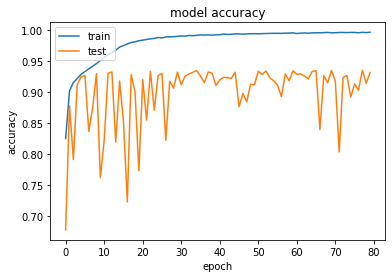

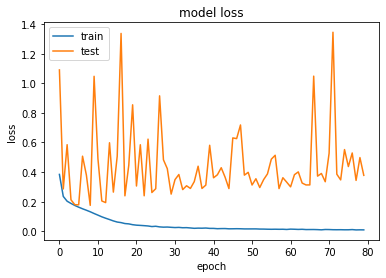

Ende des Versuchs: 


In [9]:
dense_layers = [1]
layer_sizes = [400]
conv_layers = [4]
kernal_size = [(3,3)]
for filter_size in kernal_size:
    for dense_layer in dense_layers:
        for layer_size in layer_sizes:
            for conv_layer in conv_layers:

                NAME ="PMT-MuEl-{}-filter_size-{}-conv-{}-nodes-{}-dense".format(filter_size,conv_layer, layer_size, dense_layer) #,int(time.time())
                tensorboard = TensorBoard(log_dir = 'logs\PMTplusLAPPD_CNN\{}'.format(NAME))


                model = Sequential()
                model.add(Conv2D(layer_size,filter_size,strides=1, input_shape= XTraining.shape[1:],activation="relu", padding='same'))                                               
                model.add(MaxPooling2D(pool_size=(2,2),padding='same'))
                model.add(BatchNormalization())
                model.add(Dropout(0.2))
                for l in range(conv_layer-1):                   
                    model.add(Conv2D(layer_size,filter_size,padding='same',activation="relu"))              
                    model.add(MaxPooling2D(pool_size=(2,2),padding='same'))
                    model.add(BatchNormalization())
                    model.add(Dropout(0.2))            
                #model.add(GlobalAveragePooling2D())
                model.add(Flatten())
                for l in range(dense_layer-1):
                    model.add(Dense(512-l*20 ,activation="relu" ))
                    model.add(BatchNormalization())
                    model.add(Dropout(0.2))
                model.add(Dense(32,activation="relu"))
                model.add(BatchNormalization())
                model.add(Dropout(0.2))
                model.add(Dense(2))
                model.add(Activation('softmax'))
                #adam = tf.keras.optimizers.Adam(learning_rate=0.01, beta_1=0.9, beta_2=0.999, amsgrad=True, epsilon = 0.001)
                model.compile(loss="binary_crossentropy",
                             optimizer="adam",
                              metrics=['accuracy']
                             )   
                filepath="CNN_PMT+LAPPD(5x5)_V2_PID_120k-improvement-val-acc_{val_acc:.2f}.model"  
                checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
                #monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=10, verbose=1, mode='auto', restore_best_weights=False)
                model.summary()
                history=model.fit(
                    
                    XTraining,YTraining,
              #validation_data=(XVal,Yval)
                 validation_data=(XVal,Yval)   
                    
              ,batch_size=100,
                shuffle=True,
                class_weight='balanced',
                callbacks=[
                            #monitor,
                            checkpoint,
                            #tensorboard 
                ],
              epochs= 80)
                print(history.history.keys())
                # summarize history for accuracy
                plt.plot(history.history['acc'])
                plt.plot(history.history['val_acc'])
                plt.title('model accuracy')
                plt.ylabel('accuracy')
                plt.xlabel('epoch')
                plt.legend(['train', 'test'], loc='upper left')
                plt.show()
                # summarize history for loss
                plt.plot(history.history['loss'])
                plt.plot(history.history['val_loss'])
                plt.title('model loss')
                plt.ylabel('loss')
                plt.xlabel('epoch')
                plt.legend(['train', 'test'], loc='upper left')
                plt.show()

                print("Ende des Versuchs: ")
            

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 50, 120, 400)      7600      
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 50, 120, 400)      1440400   
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 25, 60, 400)       0         
_________________________________________________________________
batch_normalization_5 (Batch (None, 25, 60, 400)       1600      
_________________________________________________________________
dropout_5 (Dropout)          (None, 25, 60, 400)       0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 25, 60, 400)       1440400   
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 13, 30, 400)      

Epoch 17/38
84900/85000 [============================>.] - ETA: 0s - loss: 0.0589 - acc: 0.9775
Epoch 00017: val_acc did not improve from 0.94020
85000/85000 [==============================] - 469s 6ms/sample - loss: 0.0589 - acc: 0.9775 - val_loss: 0.2104 - val_acc: 0.9301
Epoch 18/38
84900/85000 [============================>.] - ETA: 0s - loss: 0.0549 - acc: 0.9789
Epoch 00018: val_acc did not improve from 0.94020
85000/85000 [==============================] - 469s 6ms/sample - loss: 0.0549 - acc: 0.9790 - val_loss: 0.6005 - val_acc: 0.8291
Epoch 19/38
84900/85000 [============================>.] - ETA: 0s - loss: 0.0507 - acc: 0.9806
Epoch 00019: val_acc improved from 0.94020 to 0.94090, saving model to CNN_PMT+LAPPD(5x5)_V3_PID_120k_tf-improvement-val-acc_0.94.model
85000/85000 [==============================] - 468s 6ms/sample - loss: 0.0507 - acc: 0.9806 - val_loss: 0.1942 - val_acc: 0.9409
Epoch 20/38
84900/85000 [============================>.] - ETA: 0s - loss: 0.0451 - acc: 

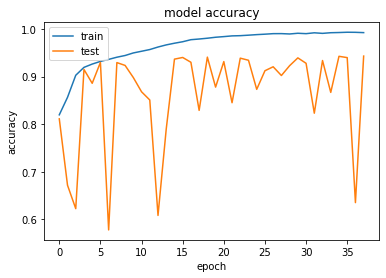

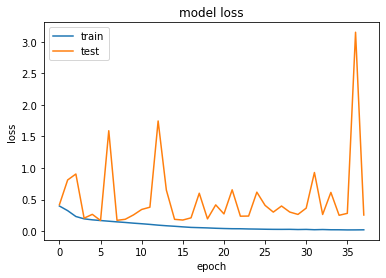

Ende des Versuchs: 


In [8]:
###### TIME FLIPPED
dense_layers = [1]
layer_sizes = [400]
conv_layers = [4]
kernal_size = [(3,3)]
for filter_size in kernal_size:
    for dense_layer in dense_layers:
        for layer_size in layer_sizes:
            for conv_layer in conv_layers:

                NAME ="PMT-MuEl-{}-filter_size-{}-conv-{}-nodes-{}-dense".format(filter_size,conv_layer, layer_size, dense_layer) #,int(time.time())
                tensorboard = TensorBoard(log_dir = 'logs\PMTplusLAPPD_CNN\{}'.format(NAME))


                model = Sequential()
                model.add(Conv2D(layer_size,filter_size,strides=1, input_shape= XTraining.shape[1:],activation="relu", padding='same'))                                               
                model.add(Conv2D(layer_size,filter_size,padding='same',activation="relu"))    
                model.add(MaxPooling2D(pool_size=(2,2),padding='same'))
                model.add(BatchNormalization())
                model.add(Dropout(0.2))
                for l in range(conv_layer-1):                   
                    model.add(Conv2D(layer_size,filter_size,padding='same',activation="relu"))              
                    model.add(MaxPooling2D(pool_size=(2,2),padding='same'))
                    model.add(BatchNormalization())
                    model.add(Dropout(0.2))            
                #model.add(GlobalAveragePooling2D())
                model.add(Flatten())
                for l in range(dense_layer-1):
                    model.add(Dense(512-l*20 ,activation="relu" ))
                    model.add(BatchNormalization())
                    model.add(Dropout(0.2))
                model.add(Dense(32,activation="relu"))
                model.add(BatchNormalization())
                model.add(Dropout(0.2))
                model.add(Dense(2))
                model.add(Activation('softmax'))
                #adam = tf.keras.optimizers.Adam(learning_rate=0.01, beta_1=0.9, beta_2=0.999, amsgrad=True, epsilon = 0.001)
                model.compile(loss="binary_crossentropy",
                             optimizer="adam",
                              metrics=['accuracy']
                             )   
                filepath="CNN_PMT+LAPPD(5x5)_V3_PID_120k_tf-improvement-val-acc_{val_acc:.2f}.model"  
                checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
                #monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=10, verbose=1, mode='auto', restore_best_weights=False)
                model.summary()
                history=model.fit(
                    
                    XTraining,YTraining,
              #validation_data=(XVal,Yval)
                 validation_data=(XVal,Yval)   
                    
              ,batch_size=100,
                shuffle=True,
                class_weight='balanced',
                callbacks=[
                            #monitor,
                            checkpoint,
                            #tensorboard 
                ],
              epochs= 38)
                print(history.history.keys())
                # summarize history for accuracy
                plt.plot(history.history['acc'])
                plt.plot(history.history['val_acc'])
                plt.title('model accuracy')
                plt.ylabel('accuracy')
                plt.xlabel('epoch')
                plt.legend(['train', 'test'], loc='upper left')
                plt.show()
                # summarize history for loss
                plt.plot(history.history['loss'])
                plt.plot(history.history['val_loss'])
                plt.title('model loss')
                plt.ylabel('loss')
                plt.xlabel('epoch')
                plt.legend(['train', 'test'], loc='upper left')
                plt.show()

                print("Ende des Versuchs: ")
            

# Evaluate

In [9]:
model = tf.keras.models.load_model("CNN_PMT+LAPPD(5x5)_V3_PID_120k_tf-improvement-val-acc_0.94.model")

W0622 12:01:13.105438 74580 deprecation.py:506] From C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\envs\Tensorflow\lib\site-packages\tensorflow\python\ops\init_ops.py:97: calling GlorotUniform.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
W0622 12:01:13.105438 74580 deprecation.py:506] From C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\envs\Tensorflow\lib\site-packages\tensorflow\python\ops\init_ops.py:97: calling Zeros.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
W0622 12:01:13.142704 74580 deprecation.py:506] From C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_6

In [10]:
score = model.evaluate(XTest, YTest, verbose=False) 
model.metrics_names
print('Test score: ', score[0])    #Loss on test
print('Test accuracy: ', score[1])

Test score:  0.2592314518591211
Test accuracy:  0.94101965


In [11]:


rounded_labels =np.argmax(YTest, axis=1)
y_prob = np.array(model.predict(XTest, batch_size=128, verbose=0))
y_classes = y_prob.argmax(axis=-1)
cm = confusion_matrix(rounded_labels, y_classes)
print(cm)


[[7014  620]
 [ 265 7106]]


In [12]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
 
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
 
    print(cm)
 
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
 
    fmt = '.3f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
 
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

[[0.91878439 0.08121561]
 [0.0359517  0.9640483 ]]


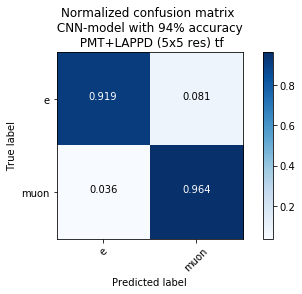

In [13]:
# Reshape into 2 x 2 matrix
cm = cm.reshape((2,2))
 
class_names = ["e", "muon"]
 
    
# Plot normalized confusion matrix
f=plt.figure()
plot_confusion_matrix(cm, classes=class_names, normalize=True,
                      title='Normalized confusion matrix \n CNN-model with 94% accuracy \n PMT+LAPPD (5x5 res) tf')
#f.savefig("Confusion-CNN-85-Prozent-MultiChannel-2-conv-130-nodes-2-dense.pdf",format ="pdf", bbox_inches='tight') 
plt.show()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 50, 120, 400)      7600      
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 50, 120, 400)      1440400   
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 25, 60, 400)       0         
_________________________________________________________________
batch_normalization_10 (Batc (None, 25, 60, 400)       1600      
_________________________________________________________________
dropout_10 (Dropout)         (None, 25, 60, 400)       0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 25, 60, 400)       1440400   
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 25, 60, 400)      

Epoch 16/80
84900/85000 [============================>.] - ETA: 0s - loss: 0.0945 - acc: 0.9629
Epoch 00016: val_acc improved from 0.93310 to 0.93445, saving model to CNN_PMT+LAPPD(5x5)_V4_PID_120k_tf-improvement-val-acc_0.93.model
85000/85000 [==============================] - 544s 6ms/sample - loss: 0.0944 - acc: 0.9629 - val_loss: 0.1907 - val_acc: 0.9344
Epoch 17/80
84900/85000 [============================>.] - ETA: 0s - loss: 0.0847 - acc: 0.9666
Epoch 00017: val_acc did not improve from 0.93445
85000/85000 [==============================] - 549s 6ms/sample - loss: 0.0847 - acc: 0.9666 - val_loss: 0.2203 - val_acc: 0.9241
Epoch 18/80
84900/85000 [============================>.] - ETA: 0s - loss: 0.0760 - acc: 0.9701
Epoch 00018: val_acc improved from 0.93445 to 0.93940, saving model to CNN_PMT+LAPPD(5x5)_V4_PID_120k_tf-improvement-val-acc_0.94.model
85000/85000 [==============================] - 557s 7ms/sample - loss: 0.0760 - acc: 0.9701 - val_loss: 0.1769 - val_acc: 0.9394
Epo

Epoch 44/80
84900/85000 [============================>.] - ETA: 0s - loss: 0.0160 - acc: 0.9946
Epoch 00044: val_acc did not improve from 0.94745
85000/85000 [==============================] - 547s 6ms/sample - loss: 0.0160 - acc: 0.9946 - val_loss: 0.3155 - val_acc: 0.9312
Epoch 45/80
84900/85000 [============================>.] - ETA: 0s - loss: 0.0152 - acc: 0.9945
Epoch 00045: val_acc did not improve from 0.94745
85000/85000 [==============================] - 547s 6ms/sample - loss: 0.0152 - acc: 0.9945 - val_loss: 0.4725 - val_acc: 0.9233
Epoch 46/80
84900/85000 [============================>.] - ETA: 0s - loss: 0.0155 - acc: 0.9945
Epoch 00046: val_acc did not improve from 0.94745
85000/85000 [==============================] - 548s 6ms/sample - loss: 0.0155 - acc: 0.9945 - val_loss: 0.4618 - val_acc: 0.9195
Epoch 47/80
84900/85000 [============================>.] - ETA: 0s - loss: 0.0128 - acc: 0.9953
Epoch 00047: val_acc did not improve from 0.94745
85000/85000 [================

Epoch 74/80
84900/85000 [============================>.] - ETA: 0s - loss: 0.0078 - acc: 0.9975
Epoch 00074: val_acc did not improve from 0.94745
85000/85000 [==============================] - 547s 6ms/sample - loss: 0.0078 - acc: 0.9975 - val_loss: 0.3080 - val_acc: 0.9428
Epoch 75/80
84900/85000 [============================>.] - ETA: 0s - loss: 0.0065 - acc: 0.9977
Epoch 00075: val_acc did not improve from 0.94745
85000/85000 [==============================] - 547s 6ms/sample - loss: 0.0065 - acc: 0.9977 - val_loss: 0.3216 - val_acc: 0.9412
Epoch 76/80
84900/85000 [============================>.] - ETA: 0s - loss: 0.0108 - acc: 0.9965
Epoch 00076: val_acc did not improve from 0.94745
85000/85000 [==============================] - 546s 6ms/sample - loss: 0.0108 - acc: 0.9965 - val_loss: 0.3486 - val_acc: 0.9352
Epoch 77/80
84900/85000 [============================>.] - ETA: 0s - loss: 0.0070 - acc: 0.9977
Epoch 00077: val_acc did not improve from 0.94745
85000/85000 [================

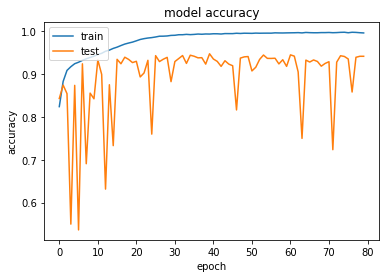

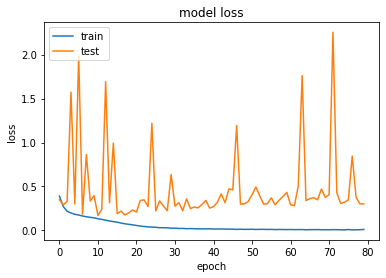

Ende des Versuchs: 


In [14]:
###### TIME FLIPPED
dense_layers = [1]
layer_sizes = [400]
conv_layers = [4]
kernal_size = [(3,3)]
for filter_size in kernal_size:
    for dense_layer in dense_layers:
        for layer_size in layer_sizes:
            for conv_layer in conv_layers:

                NAME ="PMT-MuEl-{}-filter_size-{}-conv-{}-nodes-{}-dense".format(filter_size,conv_layer, layer_size, dense_layer) #,int(time.time())
                tensorboard = TensorBoard(log_dir = 'logs\PMTplusLAPPD_CNN\{}'.format(NAME))


                model = Sequential()
                model.add(Conv2D(layer_size,filter_size,strides=1, input_shape= XTraining.shape[1:],activation="relu", padding='same'))                                               
                model.add(Conv2D(layer_size,filter_size,padding='same',activation="relu"))    
                model.add(MaxPooling2D(pool_size=(2,2),padding='same'))
                model.add(BatchNormalization())
                model.add(Dropout(0.2))
                for l in range(conv_layer-1):                   
                    model.add(Conv2D(layer_size,filter_size,padding='same',activation="relu"))
                    model.add(Conv2D(layer_size,filter_size,padding='same',activation="relu"))
                    model.add(MaxPooling2D(pool_size=(2,2),padding='same'))
                    model.add(BatchNormalization())
                    model.add(Dropout(0.2))            
                #model.add(GlobalAveragePooling2D())
                model.add(Flatten())
                for l in range(dense_layer-1):
                    model.add(Dense(512-l*20 ,activation="relu" ))
                    model.add(BatchNormalization())
                    model.add(Dropout(0.2))
                model.add(Dense(32,activation="relu"))
                model.add(BatchNormalization())
                model.add(Dropout(0.2))
                model.add(Dense(2))
                model.add(Activation('softmax'))
                #adam = tf.keras.optimizers.Adam(learning_rate=0.01, beta_1=0.9, beta_2=0.999, amsgrad=True, epsilon = 0.001)
                model.compile(loss="binary_crossentropy",
                             optimizer="adam",
                              metrics=['accuracy']
                             )   
                filepath="CNN_PMT+LAPPD(5x5)_V4_PID_120k_tf-improvement-val-acc_{val_acc:.2f}.model"  
                checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
                #monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=10, verbose=1, mode='auto', restore_best_weights=False)
                model.summary()
                history=model.fit(
                    
                    XTraining,YTraining,
              #validation_data=(XVal,Yval)
                 validation_data=(XVal,Yval)   
                    
              ,batch_size=100,
                shuffle=True,
                class_weight='balanced',
                callbacks=[
                            #monitor,
                            checkpoint,
                            #tensorboard 
                ],
              epochs= 80)
                print(history.history.keys())
                # summarize history for accuracy
                plt.plot(history.history['acc'])
                plt.plot(history.history['val_acc'])
                plt.title('model accuracy')
                plt.ylabel('accuracy')
                plt.xlabel('epoch')
                plt.legend(['train', 'test'], loc='upper left')
                plt.show()
                # summarize history for loss
                plt.plot(history.history['loss'])
                plt.plot(history.history['val_loss'])
                plt.title('model loss')
                plt.ylabel('loss')
                plt.xlabel('epoch')
                plt.legend(['train', 'test'], loc='upper left')
                plt.show()

                print("Ende des Versuchs: ")
            

# Evaluate

In [17]:
model = tf.keras.models.load_model("CNN_PMT+LAPPD(5x5)_V4_PID_120k_tf-improvement-val-acc_0.95.model")

In [18]:
score = model.evaluate(XTest, YTest, verbose=False) 
model.metrics_names
print('Test score: ', score[0])    #Loss on test
print('Test accuracy: ', score[1])

Test score:  0.2658127066654472
Test accuracy:  0.94341886


In [19]:


rounded_labels =np.argmax(YTest, axis=1)
y_prob = np.array(model.predict(XTest, batch_size=128, verbose=0))
y_classes = y_prob.argmax(axis=-1)
cm = confusion_matrix(rounded_labels, y_classes)
print(cm)


[[7063  571]
 [ 278 7093]]


In [20]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
 
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
 
    print(cm)
 
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
 
    fmt = '.3f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
 
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

[[0.92520304 0.07479696]
 [0.03771537 0.96228463]]


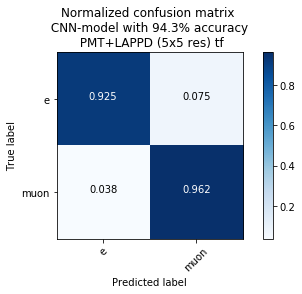

In [21]:
# Reshape into 2 x 2 matrix
cm = cm.reshape((2,2))
 
class_names = ["e", "muon"]
 
    
# Plot normalized confusion matrix
f=plt.figure()
plot_confusion_matrix(cm, classes=class_names, normalize=True,
                      title='Normalized confusion matrix \n CNN-model with 94.3% accuracy \n PMT+LAPPD (5x5 res) tf')
#f.savefig("Confusion-CNN-85-Prozent-MultiChannel-2-conv-130-nodes-2-dense.pdf",format ="pdf", bbox_inches='tight') 
plt.show()

# Perceptron

# Does Charge learn better than Charge+Time?

In [21]:
XTrainingT= XTraining[:,:,:,1].reshape(XTraining.shape[0],XTraining.shape[1],XTraining.shape[2],1)
XTestT = XTest[:,:,:,1].reshape(XTest.shape[0],XTest.shape[1],XTest.shape[2],1)
XValT = XVal[:,:,:,1].reshape(XVal.shape[0],XVal.shape[1],XVal.shape[2],1)

XTrainingC= XTraining[:,:,:,0].reshape(XTraining.shape[0],XTraining.shape[1],XTraining.shape[2],1)
XTestC = XTest[:,:,:,0].reshape(XTest.shape[0],XTest.shape[1],XTest.shape[2],1)
XValC = XVal[:,:,:,0].reshape(XVal.shape[0],XVal.shape[1],XVal.shape[2],1)

Model: "sequential_113"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_339 (Conv2D)          (None, 10, 24, 160)       1600      
_________________________________________________________________
max_pooling2d_339 (MaxPoolin (None, 5, 12, 160)        0         
_________________________________________________________________
batch_normalization_562 (Bat (None, 5, 12, 160)        640       
_________________________________________________________________
dropout_562 (Dropout)        (None, 5, 12, 160)        0         
_________________________________________________________________
conv2d_340 (Conv2D)          (None, 5, 12, 160)        230560    
_________________________________________________________________
max_pooling2d_340 (MaxPoolin (None, 3, 6, 160)         0         
_________________________________________________________________
batch_normalization_563 (Bat (None, 3, 6, 160)      

Epoch 16/38
84900/85000 [============================>.] - ETA: 0s - loss: 0.1461 - acc: 0.9408
Epoch 00016: val_acc did not improve from 0.92680
85000/85000 [==============================] - 25s 300us/sample - loss: 0.1461 - acc: 0.9408 - val_loss: 0.2501 - val_acc: 0.8924
Epoch 17/38
84900/85000 [============================>.] - ETA: 0s - loss: 0.1418 - acc: 0.9414
Epoch 00017: val_acc did not improve from 0.92680
85000/85000 [==============================] - 25s 299us/sample - loss: 0.1417 - acc: 0.9415 - val_loss: 0.2068 - val_acc: 0.9194
Epoch 18/38
84800/85000 [============================>.] - ETA: 0s - loss: 0.1374 - acc: 0.9437
Epoch 00018: val_acc did not improve from 0.92680
85000/85000 [==============================] - 25s 296us/sample - loss: 0.1375 - acc: 0.9437 - val_loss: 0.2242 - val_acc: 0.9023
Epoch 19/38
84900/85000 [============================>.] - ETA: 0s - loss: 0.1351 - acc: 0.9445
Epoch 00019: val_acc did not improve from 0.92680
85000/85000 [=============

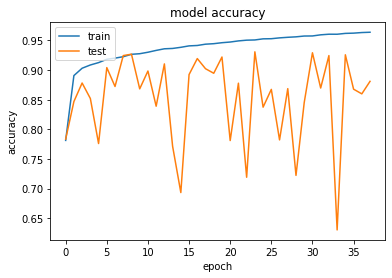

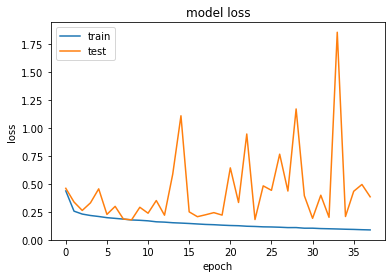

Ende des Versuchs: 


In [22]:
dense_layers = [3]
layer_sizes = [160]
conv_layers = [3]
kernal_size = [(3,3)]
for filter_size in kernal_size:
    for dense_layer in dense_layers:
        for layer_size in layer_sizes:
            for conv_layer in conv_layers:

                NAME ="PMT-MuEl-{}-filter_size-{}-conv-{}-nodes-{}-dense".format(filter_size,conv_layer, layer_size, dense_layer) #,int(time.time())
                tensorboard = TensorBoard(log_dir = 'logs\PMTplusLAPPD_CNN\{}'.format(NAME))


                model = Sequential()
                model.add(Conv2D(layer_size,filter_size,strides=1, input_shape= XTrainingC.shape[1:],activation="relu", padding='same'))                                               
                model.add(MaxPooling2D(pool_size=(2,2),padding='same'))
                model.add(BatchNormalization())
                model.add(Dropout(0.2))
                for l in range(conv_layer-1):                   
                    model.add(Conv2D(layer_size,filter_size,padding='same',activation="relu"))              
                    model.add(MaxPooling2D(pool_size=(2,2),padding='same'))
                    model.add(BatchNormalization())
                    model.add(Dropout(0.2))            
                #model.add(GlobalAveragePooling2D())
                model.add(Flatten())
                for l in range(dense_layer-1):
                    model.add(Dense(512-l*20 ,activation="relu" ))
                    model.add(BatchNormalization())
                    model.add(Dropout(0.2))
                model.add(Dense(32,activation="relu"))
                model.add(BatchNormalization())
                model.add(Dropout(0.2))
                model.add(Dense(2))
                model.add(Activation('softmax'))
                #adam = tf.keras.optimizers.Adam(learning_rate=0.01, beta_1=0.9, beta_2=0.999, amsgrad=True, epsilon = 0.001)
                model.compile(loss="binary_crossentropy",
                             optimizer="adam",
                              metrics=['accuracy']
                             )   
                filepath="CNN_Charge_PMT+LAPPD(1x1)_PID_120k_V3-improvement-val-acc_{val_acc:.2f}.model"  
                checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
                #monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=10, verbose=1, mode='auto', restore_best_weights=False)
                model.summary()
                history=model.fit(
                    
                    XTrainingC,YTraining,
              #validation_data=(XVal,Yval)
                 validation_data=(XValC,Yval)   
                    
              ,batch_size=100,
                shuffle=True,
                class_weight='balanced',
                callbacks=[
                            #monitor,
                            checkpoint,
                            #tensorboard 
                ],
              epochs= 38)
                print(history.history.keys())
                # summarize history for accuracy
                plt.plot(history.history['acc'])
                plt.plot(history.history['val_acc'])
                plt.title('model accuracy')
                plt.ylabel('accuracy')
                plt.xlabel('epoch')
                plt.legend(['train', 'test'], loc='upper left')
                plt.show()
                # summarize history for loss
                plt.plot(history.history['loss'])
                plt.plot(history.history['val_loss'])
                plt.title('model loss')
                plt.ylabel('loss')
                plt.xlabel('epoch')
                plt.legend(['train', 'test'], loc='upper left')
                plt.show()

                print("Ende des Versuchs: ")
            

# Tensorboard

cd "Documents\Python\CNN_Masterarbeit"

tensorboard --logdir=logs/ --host localhost --port 8088

tensorboard --logdir=logs/Overfitting_Studie --host localhost --port 8088

tensorboard --logdir=logs/Modell_Studie --host localhost --port 8088

# Evaluate

In [72]:
model = tf.keras.models.load_model("PMTOnly_PI_22k_RANDOM-improvement-val-acc_0.93.model")

(4552, 10, 16, 2)

In [74]:

print(XTest.shape,YTest.shape)
for sample in YTest[:20]:
    print(sample)

(4052, 10, 16, 2) (4052, 2)
[1 0]
[0 1]
[1 0]
[0 1]
[1 0]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[1 0]
[1 0]
[0 1]
[0 1]
[1 0]
[0 1]
[1 0]
[1 0]
[1 0]
[1 0]


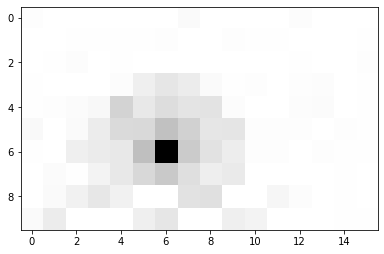

In [75]:
plt.imshow(XTest[7,:,:,0], cmap='binary', interpolation='None')

In [76]:
score = model.evaluate(XTest, YTest, verbose=False) 
model.metrics_names
print('Test score: ', score[0])    #Loss on test
print('Test accuracy: ', score[1])

Test score:  0.2208471007696615
Test accuracy:  0.9163376


# Confusion matrix


In [77]:

prediction = model.predict(XTest)
print(prediction.shape,YTest.shape)
rounded_labels =np.argmax(YTest, axis=1)
y_prob = np.array(model.predict(XTest, batch_size=128, verbose=0))
y_classes = y_prob.argmax(axis=-1)
cm = confusion_matrix(rounded_labels, y_classes)
print(cm)


(4052, 2) (4052, 2)
[[1900  185]
 [ 154 1813]]


In [48]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
 
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
 
    print(cm)
 
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
 
    fmt = '.3f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
 
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

[[0.91127098 0.08872902]
 [0.07829181 0.92170819]]


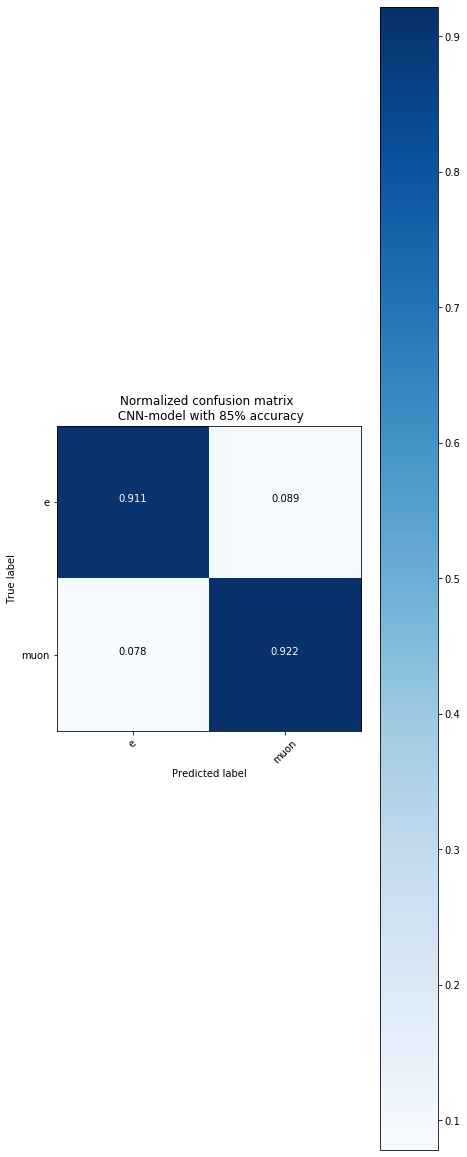

In [79]:
# Reshape into 2 x 2 matrix
cm = cm.reshape((2,2))
 
class_names = ["e", "muon"]
 
    
# Plot normalized confusion matrix
f=plt.figure()
plot_confusion_matrix(cm, classes=class_names, normalize=True,
                      title='Normalized confusion matrix \n CNN-model with 85% accuracy')
#f.savefig("Confusion-CNN-85-Prozent-MultiChannel-2-conv-130-nodes-2-dense.pdf",format ="pdf", bbox_inches='tight') 
plt.show()

In [50]:
from tensorflow import keras
import pydot_ng as pydot
from keras.utils.vis_utils import model_to_dot
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'

Using TensorFlow backend.


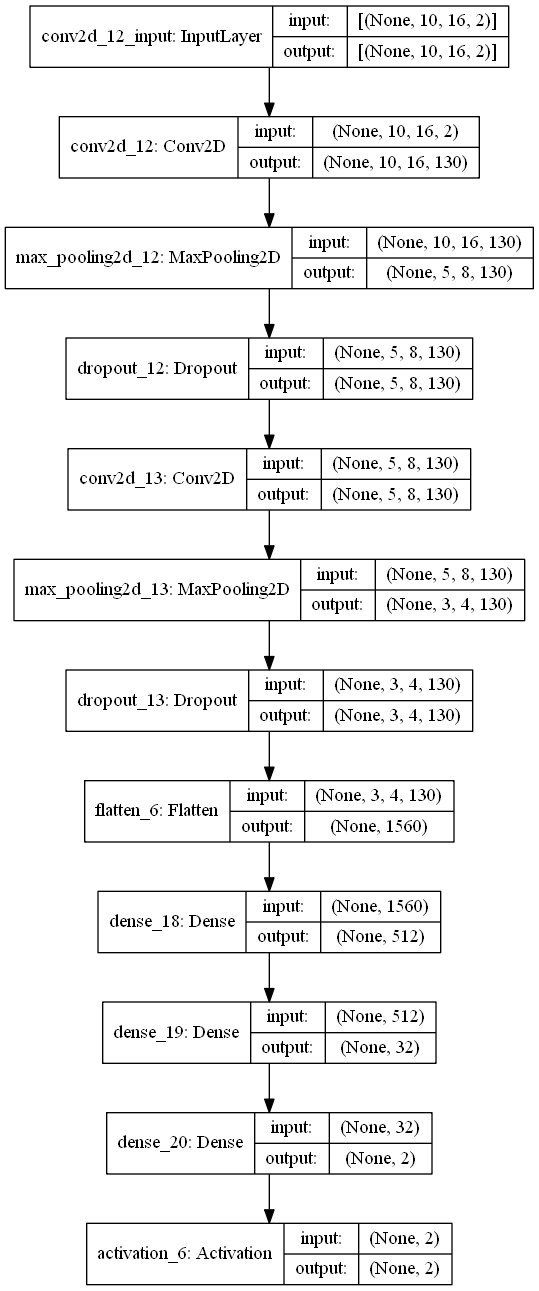

In [51]:
keras.utils.plot_model(model, 'my_first_model_with_shape_info.png', show_shapes=True)

In [53]:
from matplotlib import pyplot

conv2d_12 (5, 5, 2, 130)


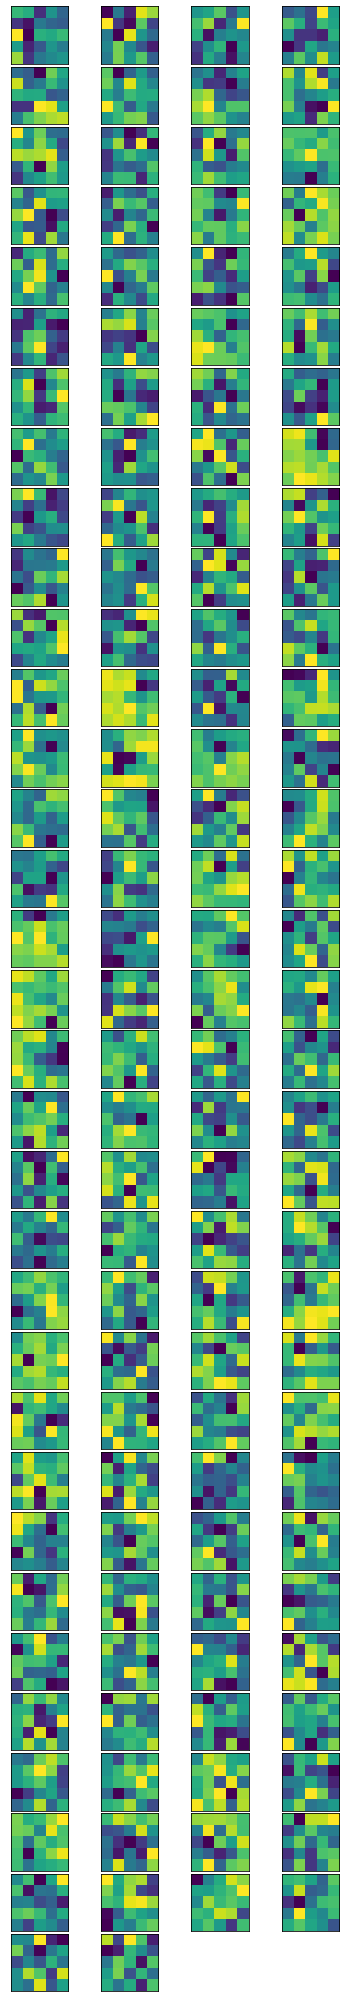

In [56]:
#summarize filter shapes
pyplot.subplots_adjust(wspace = 0.05 ,hspace = 0.05)
for layer in model.layers:
    #check for conv. layer
    if 'conv' not in layer.name:
        continue
    #get filter weights
    filters, biases = layer.get_weights()
    print(layer.name, filters.shape)
    f_min, f_max= filters.min(),filters.max()
    filters = (filters-f_min)/(f_max-f_min)
    # plot first few filters
    

    n_filters, ix = 130, 1


    for i in range(n_filters):
        #get the filter
        f = filters[:, :, :, i]
        # plot each channel separately

      


        ax = pyplot.subplot(n_filters, 4, ix)
        
        ax.set_xticks([])
        ax.set_yticks([])
        # plot filter channel in grayscale
        pyplot.imshow(f[:,:, 1], cmap='viridis')
        ix += 1
    # show the figure
    #pyplot.savefig("PMT Model 85% layer0 ALL ConvFilters-Time.jpg",format ="jpg", bbox_inches='tight')
    pyplot.show()
    
    break

In [120]:
for j in range(1):
    print(j)

0


In [55]:
plt.rcParams['figure.figsize'] = [6.4, 30*4.8]

In [57]:
for i in range(len(model.layers)):
    layer = model.layers[i]
    # check for convolutional layer
    if 'conv' not in layer.name:
        continue
    print(i, layer.name, layer.output.shape)

0 conv2d_12 (?, 10, 16, 130)
3 conv2d_13 (?, 5, 8, 130)


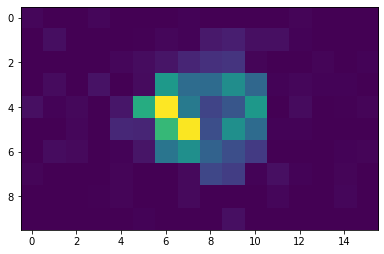

In [58]:
plt.imshow(X[9,:,:,0], cmap='viridis', interpolation='None')

In [86]:
plt.rcParams['figure.figsize'] = [6.4, 10*4.8]

Model: "model_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_14_input (InputLayer) [(None, 10, 16, 2)]       0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 10, 16, 130)       6630      
Total params: 6,630
Trainable params: 6,630
Non-trainable params: 0
_________________________________________________________________
(1, 10, 16, 130)


ValueError: num must be 1 <= num <= 52, not 53

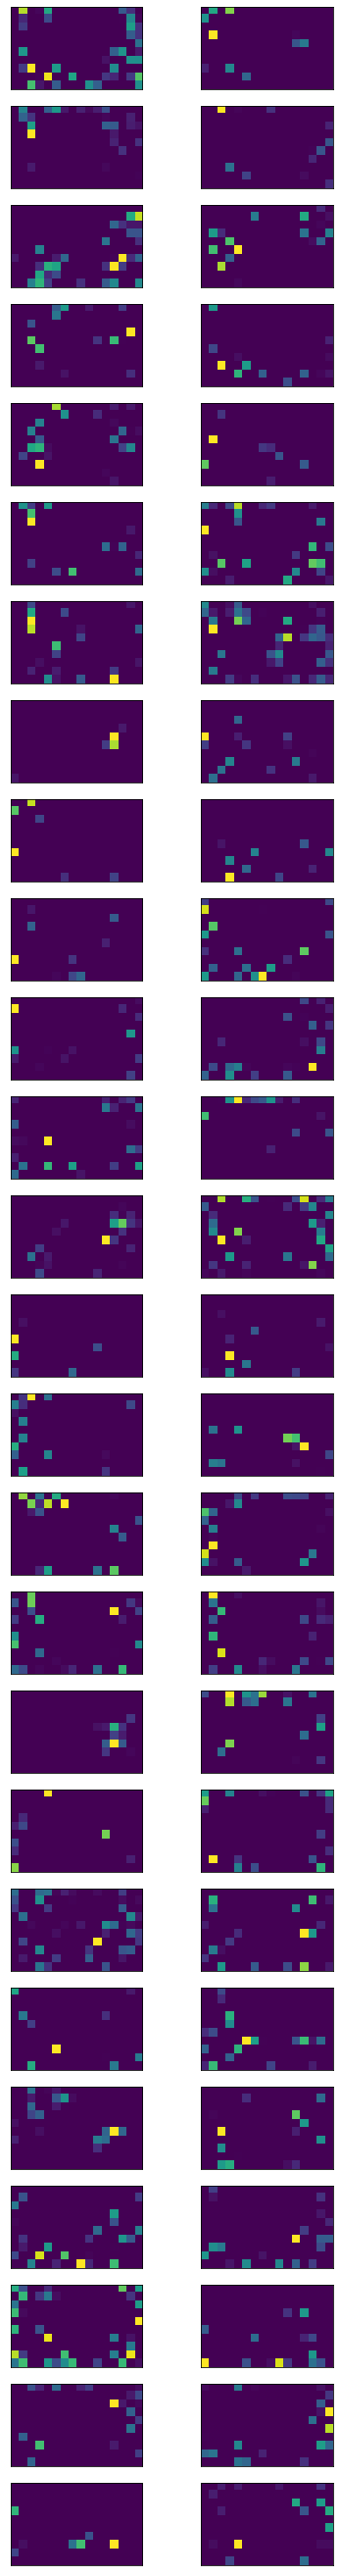

In [89]:
model = tf.keras.models.load_model("PMTOnly_PI_22k_RANDOM-improvement-val-acc_0.93.model")

from tensorflow.keras.models import Model
from matplotlib import pyplot
from numpy import expand_dims



ixs = [0]

outputs = [model.layers[i].output for i in ixs]



model = Model(inputs=model.inputs, outputs=model.layers[0].output)

model.summary()





# get feature map for first hidden layer
feature_maps = model.predict(XTest[9:10])
print(feature_maps.shape)
# plot all 64 maps in an 8x8 squares

#for fmap in feature_maps:
ix = 1
a=130
for _ in range(a):
    for _ in range(a):
        if ix==a+1:
            break
        # specify subplot and turn of axis
        ax = pyplot.subplot(26, 2, ix)
        ax.set_xticks([])
        ax.set_yticks([])

        # plot filter channel in grayscale
        pyplot.imshow(feature_maps[0, :, :, ix-1], cmap='viridis')
        ix += 1
    # show the figure
#pyplot.savefig("PMT layer0 ALL Conv ElectronEvent9.jpg",format ="jpg", bbox_inches='tight')
pyplot.show()
